In [18]:
from ctypes import *
from ctypes.util import find_library
from os import path
import sys
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from libsvm.svmutil import *
import xlrd

In [5]:
cv_rec = pd.DataFrame(columns = ['d=1', 'd=2', 'd=3', 'd=4'], index = [i for i in range(-15,16)])
cv_rec.index.name = 'C'
train_scaled, test_scaled = pd.read_csv('train_scaled.data'), pd.read_csv('test_scaled.data')

In [6]:
d_list = [1,2,3,4]
c_list = [2**(i) for i in range(-15,16)]
y_train, X_train = svm_read_problem('train_scaled.data')
for i in range(4):
    result = []
    d = i+1
    for c in range(-15,16):
        result.append(svm_train(y_train, X_train, '-t 1 -d '+str(d) +' -c '+str(2**(c)) +' -v 10'))
    cv_rec.iloc[:,i] = result
    
cv_error = cv_rec.transform(lambda x: 1-x/100)


Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.7836%
Cross Validation Accuracy = 78.5828%
Cross Validation Accuracy = 80.5298%
Cross Validation Accuracy = 81.264%
Cross Validation Accuracy = 81.0086%
Cross Validation Accuracy = 81.1682%
Cross Validation Accuracy = 81.6151%
Cross Validation Accuracy = 81.9981%
Cross Validation Accuracy = 82.5726%
Cross Validation Accuracy = 83.1152%
Cross Validation Accuracy = 83.5302%
Cross Validation Accuracy = 83.4344%
Cross Validation Accuracy = 83.5621%
Cross Validation Accuracy = 83.3706%
Cross Validation Accuracy = 83.2429%
Cross Validation Accuracy = 83.1152%
Cross Validation Accuracy = 83.4344%
Cross Validation Accuracy = 83.3067%
Cross Validation Accuracy = 83.2748%
Cr

,d=1,d=2,d=3,d=4
C,,,,
-15,0.343441,0.343441,0.343441,0.343441
-14,0.343441,0.343441,0.343441,0.343441
-13,0.343441,0.343441,0.343441,0.343441
-12,0.343441,0.343441,0.343441,0.343441
-11,0.343441,0.343441,0.343441,0.343441


In [7]:
for i in range(4):
    std = cv_error.iloc[:,i].std()
    plt.plot(cv_error.index, cv_error.iloc[:,i])
    plt.plot(cv_error.index, cv_error.iloc[:,i] + std)
    plt.plot(cv_error.index, cv_error.iloc[:,i] - std)
    
    plt.legend(['error + 1 std', 'error','error - 1 std'])
    plt.title('d='+str(i+1))
    plt.show()
    
print('global min is: ')(cv_error.min(axis=1).idxmin(), cv_error.min().idxmin())

In [10]:
model = svm_train(y_train,X_train,'-t 1 -d 2 -c 16384')
svm_save_model('model.data', model)

In [13]:
y_test, X_test = svm_read_problem('test_scaled.data')
plot_y_f = cv_error.loc[10]
plot_y_s = []

for i in range(4):
    d = i+1
    model = svm_train(y_train, X_train, '-t 1 -d '+str(d) +' -c 16384')
    test_err = svm_predict(y_test, X_test, model)
    plot_y_s.append(1 - test_err[1][0]/100)

Accuracy = 74.7126% (780/1044) (classification)
Accuracy = 48.2759% (504/1044) (classification)
Accuracy = 65.2299% (681/1044) (classification)
Accuracy = 30.9387% (323/1044) (classification)


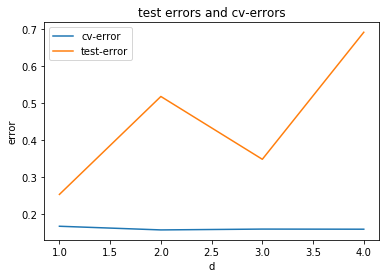

In [14]:
plt.plot([1,2,3,4], plot_y_f)
plt.plot([1,2,3,4], plot_y_s)
plt.title('test errors and cv-errors')
plt.legend(['cv-error','test-error'])
plt.xlabel('d')
plt.ylabel('error')
plt.show()

In [19]:
nSV = []
nBSV = []
for i in range(4):
    file_name = 'd='+str(i+1)+'.xlsx'
    data = pd.read_excel(file_name)
    nSV.append(data['nSV'].mean())
    nBSV.append(data['nBSV'].mean())

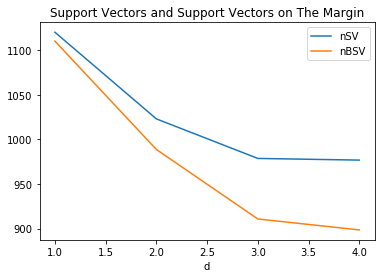

In [20]:
plt.plot([1,2,3,4], nSV)
plt.plot([1,2,3,4], nBSV)
plt.title('Support Vectors and Support Vectors on The Margin')
plt.legend(['nSV','nBSV'])
plt.xlabel('d')
plt.show()